#                                    GRIP - The Sparks Foundation

## Data Science and Business Analytics Internship

### Linear Regression with Python Scikit Learn - Prediction using Supervised Machine Leaning

### Author: Kumar Kairav

#### Task-1: Predict the percentage of an student based on the no. of study hours 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the no. of hours they studied. 

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("Libraries successfully imported")

Libraries successfully imported


## Reading data from source

In [2]:
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)
print("Data successfully imported")

Data successfully imported


## Data Exploration

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows higher correlation between hours and scores

## Data Visualisation

### Visualizing using line plot

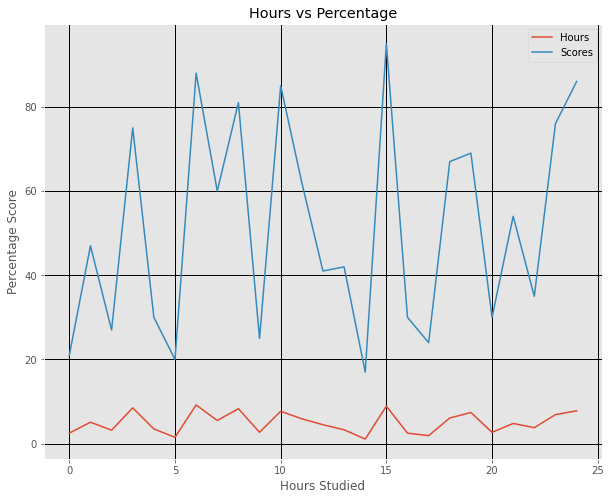

In [9]:
plt.style.use('ggplot')
df.plot(kind = 'line',figsize=(10,8))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(b= True, color='k', linestyle='-', linewidth=1)
plt.legend(loc =1)
plt.show()

### Visualizing using area plot

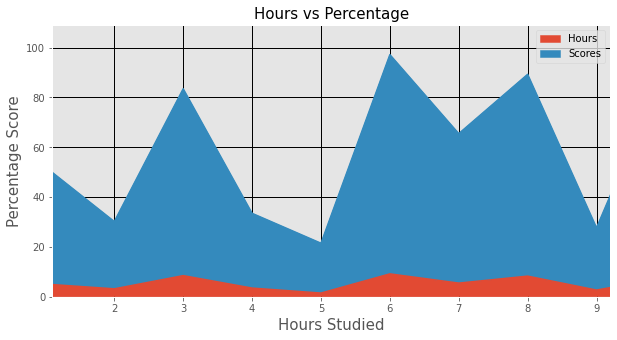

In [10]:
xmin = min(df.Hours)
xmax = max(df.Hours)
df.plot(kind = 'area', alpha = 1, stacked = True, figsize = (10,5), xlim=(xmin,xmax))
plt.title('Hours vs Percentage', size = 15)
plt.xlabel('Hours Studied', size = 15)
plt.ylabel('Percentage Score', size = 15)
plt.grid(b= True, color='k', linestyle='-', linewidth=1)
plt.legend(loc =1)
plt.show()

### Visualizing using area plot

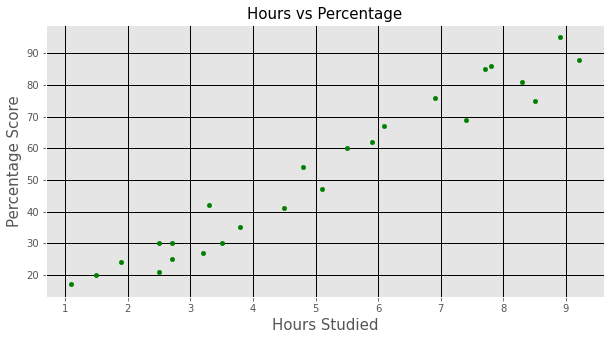

In [11]:
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores', color = 'g',figsize = (10,5))
plt.title('Hours vs Percentage', size = 15)
plt.xlabel('Hours Studied', size = 15)
plt.ylabel('Percentage Score', size = 15)
plt.grid(b= True, color='k', linestyle='-', linewidth=1)
plt.show()

By visualization we came to know that this problem can be solved by linear regression

### Data Splitting

In [12]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

### ML Model Training

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
print("Training Completed")

Training Completed


In [14]:
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [9.56433743]
Intercept:  2.701970681675256


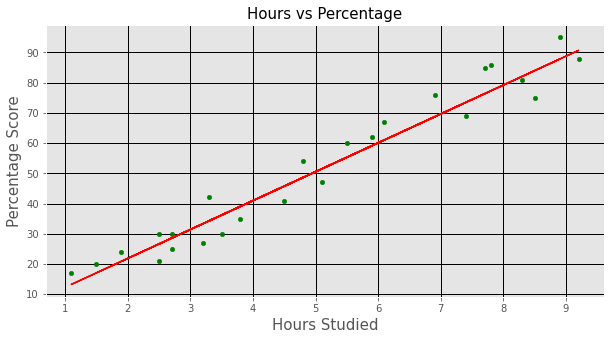

In [15]:
# We can also plot the fit line over the data in single linear regression
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores', color = 'g',figsize = (10,5))
plt.plot(X_train,lr.coef_[0]*X_train + lr.intercept_, color = 'r')
plt.title('Hours vs Percentage', size = 15)
plt.xlabel('Hours Studied', size = 15)
plt.ylabel('Percentage Score', size = 15)
plt.grid(b= True, color='k', linestyle='-', linewidth=1)
plt.show()

Red line is the best fit line for this data

### Evaluation of the Model:

In [16]:
# Using metrics to find mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
print('Mean absolute error : {}'.format(metrics.mean_absolute_error(y_pred,y_test)))
print('R2-Score: %.2f' % r2_score(y_pred,y_test))

Mean absolute error : 4.6422390298182545
R2-Score: 0.92


### Comparing actual vs predicted

In [17]:
y_pred

array([55.30582657, 76.34736893, 68.69589898, 82.08597139, 28.52568176])

In [18]:
y_test

array([60, 85, 76, 81, 30], dtype=int64)

In [19]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,60,55.305827
1,85,76.347369
2,76,68.695899
3,81,82.085971
4,30,28.525682


### Predicting the score with single input value

In [20]:
hours = 8.5
predicted_score = lr.predict([[hours]])

print('No. of hours= ', hours)
print('Predicted Score= ',predicted_score[0])

No. of hours=  8.5
Predicted Score=  83.99883887822733
